# Block 5 Exercise 1: Classification

## MNIST Data
In these exercises we are using the MNIST data set on handwritten digits to compare supervised classification algorithms...   

In [12]:
#imports 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve,plot_roc_curve,RocCurveDisplay,auc
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

In [2]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


In [3]:
#the full MNIST data set contains 70k samples of digits 0-9 as 28*28 gray scale images (represented as 784 dim vectors)
np.shape(X)

(70000, 784)

### E1.1: Use SkLearn methods to split the MNIST data into random train and test sets. Use 60k samples for training.  


In [4]:
X_Train, X_Test, y_Train, y_Test = train_test_split(X , y, test_size=(1-(6/7)))

### E1.2: Visualize the data.
* Plot some data samples as images (use https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html)

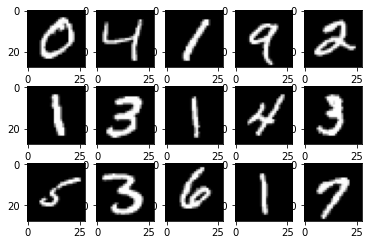

In [11]:
for i in range(1,16):
    plt.subplot(3,5,i)
    plt.imshow(np.reshape(X[i],(28,28)),cmap='gray')

### E1.3: Train models on the train data.
Train the following models with default parameters on the train data.
* [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) (assuming a Gaussian distribution of the data)
* [Simple linear model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)
   * use ``loss='log'`` to reproduce our logistic loss function 
* [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

Compare the training accuracy (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) and [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) for all three models.

Training accuracy :
0.5632260537675627
Confusion Matrix:


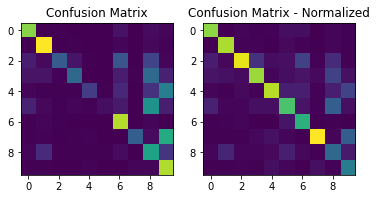

In [6]:
# Naive Bayes
clfNB = GaussianNB()
clfNB.fit(X_Train, y_Train)

y_pred_train = clfNB.predict(X_Train)

print("Training accuracy :")
print(accuracy_score(y_Train, y_pred_train))
               
print("Confusion Matrix:")
conf = confusion_matrix(y_Train, y_pred_train)
plt.subplot(1,2,1)
plt.title("Confusion Matrix")
plt.imshow(conf)

conf_norm = confusion_matrix(y_Train, y_pred_train,normalize='pred')
plt.subplot(1,2,2)
plt.title("Confusion Matrix - Normalized")
plt.imshow(conf_norm)

D:\Programme\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Training accuracy :
0.9185486424773747
Confusion Matrix:


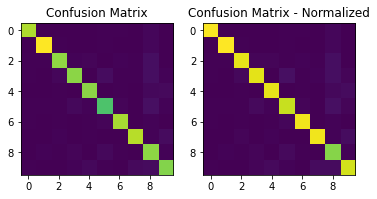

In [7]:
# Simple linear model
clfSL = make_pipeline(StandardScaler(),SGDClassifier(loss='log',max_iter=100))
clfSL.fit(X_Train, y_Train)

y_pred_train = clfSL.predict(X_Train)

print("Training accuracy :")
print(accuracy_score(y_Train, y_pred_train))
               
print("Confusion Matrix:")
conf = confusion_matrix(y_Train, y_pred_train)
plt.subplot(1,2,1)
plt.title("Confusion Matrix")
plt.imshow(conf)

conf_norm = confusion_matrix(y_Train, y_pred_train,normalize='pred')
plt.subplot(1,2,2)
plt.title("Confusion Matrix - Normalized")
plt.imshow(conf_norm)

Training accuracy :
0.9651327522125369
Confusion Matrix:


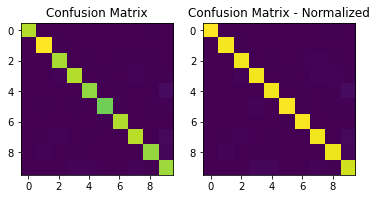

In [17]:
# Random Forest
clfRF = RandomForestClassifier(n_estimators=100, max_depth=10)
clfRF.fit(X_Train, y_Train)

y_pred_train = clfRF.predict(X_Train)

print("Training accuracy :")
print(accuracy_score(y_Train, y_pred_train))
               
print("Confusion Matrix:")
conf = confusion_matrix(y_Train, y_pred_train)
plt.subplot(1,2,1)
plt.title("Confusion Matrix")
plt.imshow(conf)

conf_norm = confusion_matrix(y_Train, y_pred_train,normalize='pred')
plt.subplot(1,2,2)
plt.title("Confusion Matrix - Normalized")
plt.imshow(conf_norm)

### E1.4: Evaluate and compare the models on the test set.
* compute the test [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) 
* compute the [F-Measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
* plot a [ROC curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) for the class "5" for all three models.
                          

In [18]:
y_pred_NB = clfNB.predict(X_Test)
y_pred_SL = clfSL.predict(X_Test)
y_pred_RF = clfRF.predict(X_Test)

In [19]:
print('Accuracy:',
      '\nNaive Bayes: \t\t',       accuracy_score(y_Test,y_pred_NB), 
      '\nSimple linear Model: \t', accuracy_score(y_Test,y_pred_SL),
      '\nRandom Forest: \t\t',     accuracy_score(y_Test, y_pred_RF))

Accuracy: 
Naive Bayes: 		 0.5624437556244376 
Simple linear Model: 	 0.9115088491150884 
Random Forest: 		 0.9453054694530547


In [20]:
print('F-Measure:',
      '\nNaive Bayes: \t\t',       f1_score(y_Test,y_pred_NB,average = 'macro' ), 
      '\nSimple linear Model: \t', f1_score(y_Test,y_pred_SL,average = 'macro' ),
      '\nRandom Forest: \t\t',     f1_score(y_Test,y_pred_RF,average = 'macro' ))

F-Measure: 
Naive Bayes: 		 0.5146532509510799 
Simple linear Model: 	 0.9108839263998437 
Random Forest: 		 0.9451437898192652


Text(0.5, 1.0, 'Random Forest')

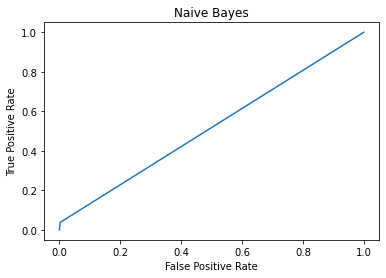

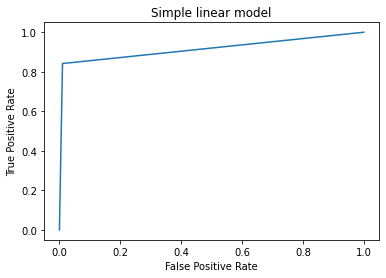

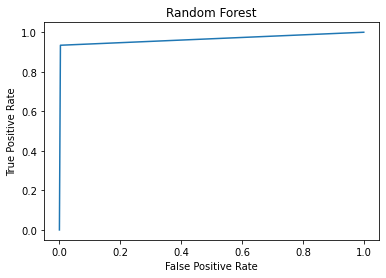

In [22]:
y_test_5 = y_Test=='5'
y_pred_NB_5 = clfNB.predict(X_Test).astype(int)==5
y_pred_SL_5 = clfSL.predict(X_Test).astype(int)==5
y_pred_RF_5= clfRF.predict(X_Test).astype(int)==5

fpr_NB, tpr_NB, threshold_NB = roc_curve(y_test_5, y_pred_NB_5)
fpr_SL, tpr_SL, threshold_SL = roc_curve(y_test_5, y_pred_SL_5)
fpr_RF, tpr_RF, threshold_RF = roc_curve(y_test_5, y_pred_RF_5)

roc_display = RocCurveDisplay(fpr=fpr_NB, tpr=tpr_NB).plot()
plt.title('Naive Bayes')
roc_display = RocCurveDisplay(fpr=fpr_SL, tpr=tpr_SL).plot()
plt.title('Simple linear model')
roc_display = RocCurveDisplay(fpr=fpr_RF, tpr=tpr_RF).plot()
plt.title('Random Forest')